# Лабораторна робота №6
Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.

Постановка задачі: Ознайомтесь з теоретичним матеріалом. Створіть програму для обчислення лінійної регресії
методом найменших квадратів та градієнтним спуском.

Протокол підготував студент групи ФБ-21 Шабанов Кирило

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Завдання 1:
1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів.

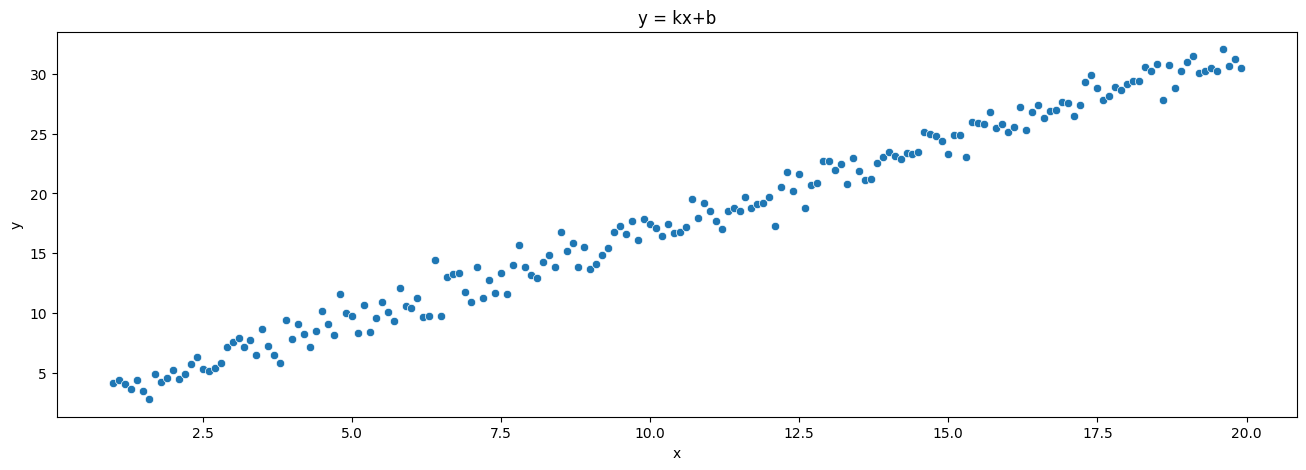

In [2]:
#Original function
x = np.arange(1,20,0.1)
b = 2
k = 1.5
y = k*x+b
#add noise
def gen_random_data(y,size,scale):
    f = np.random.normal(loc = y, scale=scale, size=size)
    return f

y_0 = gen_random_data(y, y.shape[0],1)

plt.figure(figsize=(16,5))
plt.title('y = kx+b')
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(x=x,y=y_0)
plt.show()


2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.

In [3]:
def least_square_method(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    k = np.sum((x-mean_x)*(y-mean_y))/np.sum((x-mean_x)**2)
    b = mean_y - k*mean_x

    return k,b

3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [4]:
#numpy library 
f2 = np.polyfit(x,y_0,1)
y2 = f2[0]*x+f2[1]
y2-y

array([-0.04932765, -0.04968626, -0.05004487, -0.05040349, -0.0507621 ,
       -0.05112072, -0.05147933, -0.05183795, -0.05219656, -0.05255517,
       -0.05291379, -0.0532724 , -0.05363102, -0.05398963, -0.05434824,
       -0.05470686, -0.05506547, -0.05542409, -0.0557827 , -0.05614131,
       -0.05649993, -0.05685854, -0.05721716, -0.05757577, -0.05793438,
       -0.058293  , -0.05865161, -0.05901023, -0.05936884, -0.05972745,
       -0.06008607, -0.06044468, -0.0608033 , -0.06116191, -0.06152052,
       -0.06187914, -0.06223775, -0.06259637, -0.06295498, -0.06331359,
       -0.06367221, -0.06403082, -0.06438944, -0.06474805, -0.06510667,
       -0.06546528, -0.06582389, -0.06618251, -0.06654112, -0.06689974,
       -0.06725835, -0.06761696, -0.06797558, -0.06833419, -0.06869281,
       -0.06905142, -0.06941003, -0.06976865, -0.07012726, -0.07048588,
       -0.07084449, -0.0712031 , -0.07156172, -0.07192033, -0.07227895,
       -0.07263756, -0.07299617, -0.07335479, -0.0737134 , -0.07

4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

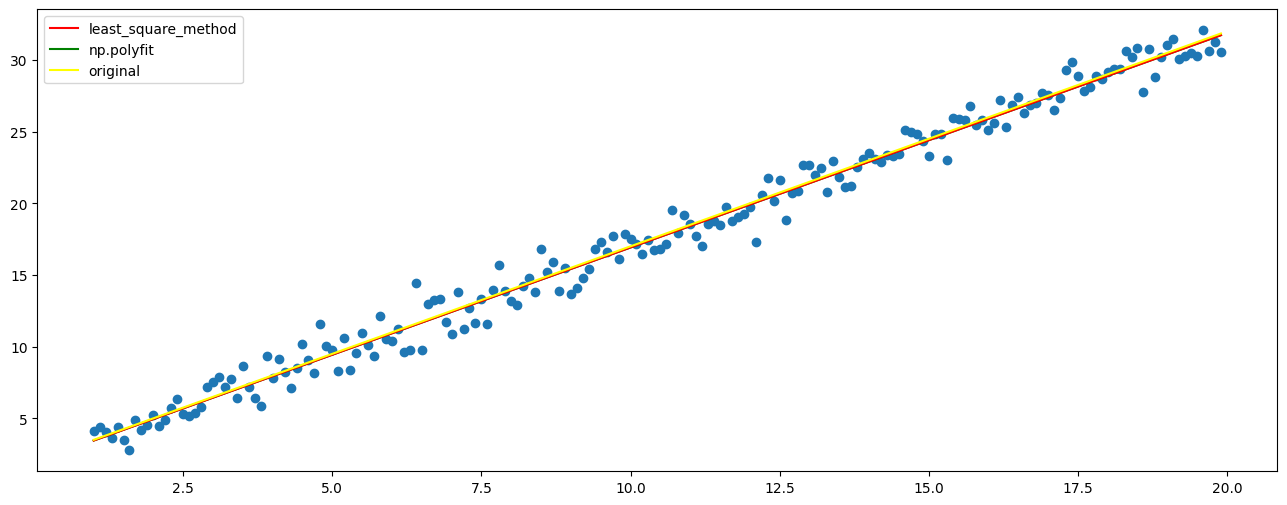

In [5]:
#least_square_method
k1,b1 = least_square_method(x,y_0)
y1 = k1*x+b1

#graphic function
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.scatter(x,y_0)


l2, = ax.plot(x,y2,color='green')
l1, = ax.plot(x,y1,color='red')
l3, = ax.plot(x,y,color='yellow')
ax.legend([l1, l2, l3], ['least_square_method', 'np.polyfit', 'original'])
plt.show()

Завдання 2 (2б):
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [6]:
def grad_descent(x,y,k,b,learning_rate, iter_n):
    params = np.zeros(shape=(2,))
    n = y.shape[0]
    for _ in range(iter_n):
        f = k*x+b
        d1_b = (-2/n)*np.sum(y-f)
        d2_k = (-2/n)*np.sum(x*(y-f))
        b = b-learning_rate*d1_b
        k = k-learning_rate*d2_k

    params[0] = k
    params[1] = b
    return params

params = grad_descent(x,y,0,0,0.003515,10000)

y3 = params[0]*x+params[1]

2. Додайте отриману лінію регресії на загальний графік

C:\Users\student05\AppData\Local\Temp\ipykernel_31936\2569105843.py:9: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend([l1, l2, l3,l4], ['least_square_method', 'np.polyfit', 'original','grad_descent'])


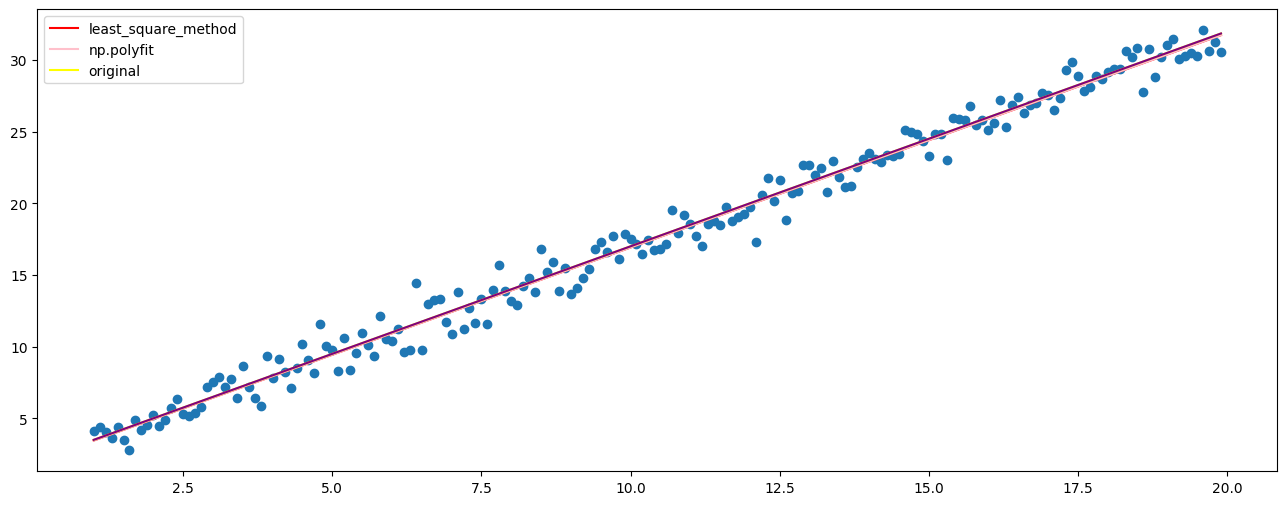

In [7]:
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.scatter(x,y_0)

l1, = ax.plot(x,y1,color='red')
l2, = ax.plot(x,y2,color='pink')
l3, = ax.plot(x,y,color='yellow')
l4 = ax.plot(x,y3,color='purple')
ax.legend([l1, l2, l3,l4], ['least_square_method', 'np.polyfit', 'original','grad_descent'])
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

In [8]:
def mae_func(y,y_tilda):
    res = np.sum(np.abs(y-y_tilda))/y.shape[0]
    return res

In [9]:
iters = np.arange(0,1000,1)
grad_descent_iters = np.ndarray(shape=iters.shape[0])
mse_v_it = np.zeros(iters.shape)

for i in iters:
    params1 = grad_descent(x,y,0,0,0.0035215,i)
    func = params1[0]*x+params1[1]
    mse_v_it[i] =  mae_func(y,func)

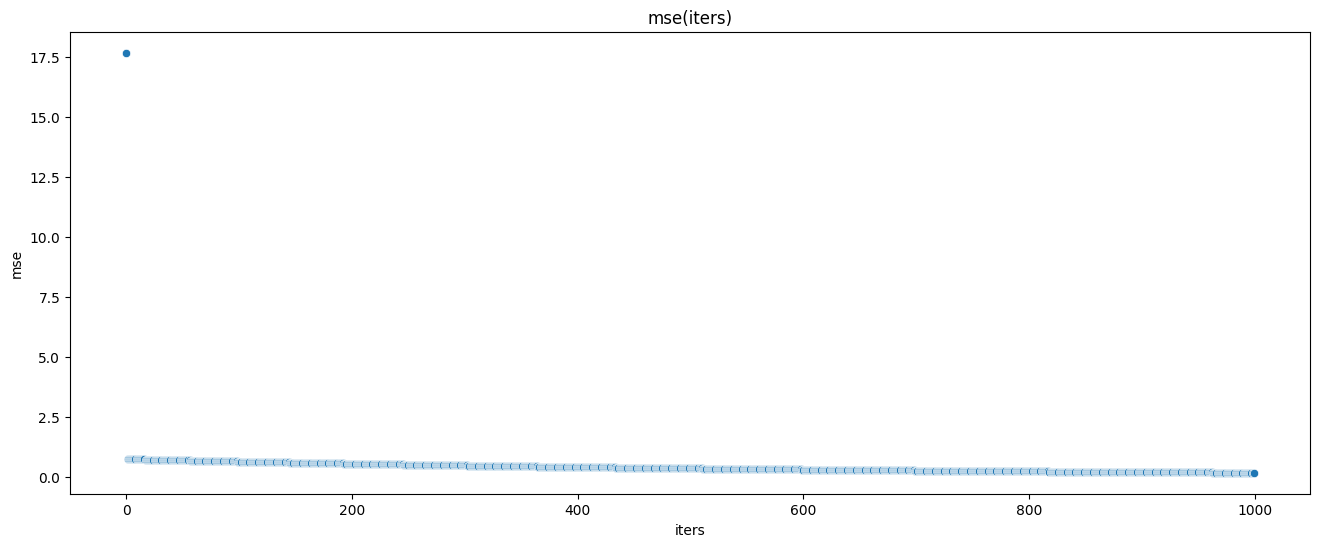

In [10]:
plt.figure(figsize=(16,6))
plt.xlabel('iters')
plt.ylabel('mse')
sns.scatterplot(x=iters,y=mse_v_it)
plt.title('mse(iters)')
plt.show()

З графіку видно, що чим більша кількість ітерацій, тим значення MAE ближче до нуля => підвищення точності прогнозів + з графіку видно, що наш "оригінальний графік" повністю співпадає з регресійним

4. Порівняйте отримані результати з результатами попереднього завдання

In [11]:
print(y3-y1)

[0.04932717 0.04968579 0.05004441 0.05040302 0.05076164 0.05112026
 0.05147888 0.0518375  0.05219611 0.05255473 0.05291335 0.05327197
 0.05363059 0.0539892  0.05434782 0.05470644 0.05506506 0.05542368
 0.05578229 0.05614091 0.05649953 0.05685815 0.05721677 0.05757538
 0.057934   0.05829262 0.05865124 0.05900985 0.05936847 0.05972709
 0.06008571 0.06044433 0.06080294 0.06116156 0.06152018 0.0618788
 0.06223742 0.06259603 0.06295465 0.06331327 0.06367189 0.06403051
 0.06438912 0.06474774 0.06510636 0.06546498 0.0658236  0.06618221
 0.06654083 0.06689945 0.06725807 0.06761668 0.0679753  0.06833392
 0.06869254 0.06905116 0.06940977 0.06976839 0.07012701 0.07048563
 0.07084425 0.07120286 0.07156148 0.0719201  0.07227872 0.07263734
 0.07299595 0.07335457 0.07371319 0.07407181 0.07443043 0.07478904
 0.07514766 0.07550628 0.0758649  0.07622352 0.07658213 0.07694075
 0.07729937 0.07765799 0.0780166  0.07837522 0.07873384 0.07909246
 0.07945108 0.07980969 0.08016831 0.08052693 0.08088555 0.08124